# Lecture 6: Graphical Solution Method

In this lecture, we will further discuss the graphical solution method for linear programming through other two-variable problems.

---

## Example #2

Consider the two routes, R1 and R2, connecting Chennai Central Railway Station to Madras International Meenambakkam Airport. Here, R1 is a major arterial route with a travel time of 30 minutes and capacity of 1000 vehicles per hour. On the other hand, R2 is a collector route with a travel time of 45 minutes and capacity of 750 vehicles per hour. Assuming that Chennai Unified Metropolitan Transport Authority (CUMTA) has approporiate traffic control systems to route traffic through either of these routes, how should CUMTA allocate vehicles to each route in order to minimise the total vehicle hours traveled (VHT)?

Obective:

$$
\min_{x_1, x_2} \ Z = 30x_1 + 45x_2
$$

Subject to:

$$
\begin{aligned}
  & x_1 + x_2 \geq 1200 \\
  & x_1 \leq 1000 \\
  & x_2 \leq 750 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

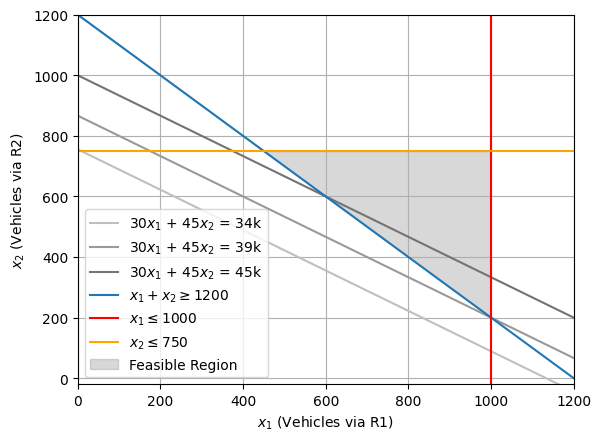

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 30, 45             # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 1, 1200   # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 0, 1000    # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 0, 1, 750    # Coefficients for constraint a31 * x1 + a32 * x2 <= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Define set of isocost values (C)
C = [34000, 39000, 45000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for isocost line c1 * x1 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c1}$x_1$ + {c2}$x_2$ = {c//1000}k')

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 <= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'$x_1 + x_2 \geq {b1}$')
plt.axvline(x=b2, label=fr'$x_1 \leq {b2}$', color='red')
plt.axhline(y=b3, label=fr'$x_2 \leq {b3}$', color='orange')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_1, np.maximum(x2_1, x2_3), where=(x1 <= b2), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, b1/a11)
plt.ylim(-20, b1/a12)
plt.xlabel(r'$x_1$ (Vehicles via R1)')
plt.ylabel(r'$x_2$ (Vehicles via R2)')
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

In this problem, the constraints define a bounded feasible region, making (1000, 200) the unique optimal solution with $x_1 + x_2 \geq 1200$ and $x_1 \leq 1000$ forming the binding constraints, while $x_2 \leq 750$ and $x_1, x_2 \geq 0$ forming the non-binding constraints. Thus, CUMTA should route 1000 vehicles via R1 and remaining 200 via R2 between Chennai Central Railway Station to Madras International Meenambakkam Airport, rendering 39k vehicle hours traveled (VHT).

---

How does the solution change if both routes had a travel time of 40 minutes instead?

Obective:

$$
\min_{x_1, x_2} \ Z = 40x_1 + 40x_2
$$

Subject to:

$$
\begin{aligned}
  & x_1 + x_2 \geq 1200 \\
  & x_1 \leq 1000 \\
  & x_2 \leq 750 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

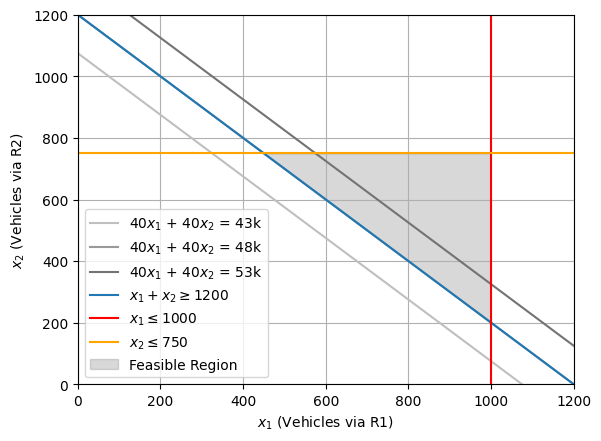

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 40, 40             # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 1, 1200   # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 0, 1000    # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 0, 1, 750    # Coefficients for constraint a31 * x1 + a32 * x2 <= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Define set of isocost values (C)
C = [43000, 48000, 53000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for isocost line c1 * x1 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c1}$x_1$ + {c2}$x_2$ = {c//1000}k')

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 <= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 <= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'$x_1 + x_2 \geq {b1}$')
plt.axvline(x=b2, label=fr'$x_1 \leq {b2}$', color='red')
plt.axhline(y=b3, label=fr'$x_2 \leq {b3}$', color='orange')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_1, np.maximum(x2_1, x2_3), where=(x1 <= b2), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, b1/a11)
plt.ylim(0, b1/a12)
plt.xlabel(r'$x_1$ (Vehicles via R1)')
plt.ylabel(r'$x_2$ (Vehicles via R2)')
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

With both routes having same travel time, all solutions on the line $x_1 + x_2 = 1200$ such that $x_1 \leq 1000$ and $x_2 \leq 750$ are optimal.

In such a scenario, how should CUMTA route vehicles between the two routes?

1. Distribute traffic evenly, i.e., $x_2 / x_1 = 1$, thus rendering $(600, 600)$ as the optimal solution.
1. Balance flows based on route capacity such that $x_2 / x_1 = 0.75$, thus rendering $(685.7, 514.3)$ as the optimal solution.
1. Maintain traffic to reduce pavement wear & tear based on pavement quality and associated maintenance schedule, for instance, $x_2 / x_1 = 0.5$, thus rendering $(800, 400)$ as the optimal solution.

---

How does the solution change if capacity of route R1 is instead 300 vehicles?

Obective:

$$
\min_{x_1, x_2} \ Z = 30x_1 + 45x_2
$$

Subject to:

$$
\begin{aligned}
  & x_1 + x_2 \geq 1200 \\
  & x_1 \leq 300 \\
  & x_2 \leq 750 \\
  & x_1, x_2 \geq 0
\end{aligned}
$$

In [ ]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 40, 40             # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 1, 1200   # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 1, 0, 300    # Coefficients for constraint a21 * x1 + a22 * x2 <= b2
a31, a32, b3 = 0, 1, 750    # Coefficients for constraint a31 * x1 + a32 * x2 <= b3

def foo(b2):
  # Define the range of x1 values
  x1 = np.linspace(0, b1/a11, 400)

  # Calculate x2 values for each constraint
  x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
  x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 <= b2
  x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 <= b3

  # Plot the constraints
  plt.plot(x1, x2_1, label=fr'$x_1 + x_2 \geq {b1}$')
  plt.axvline(x=b2, label=fr'$x_1 \leq {b2}$', color='red')
  plt.axhline(y=b3, label=fr'$x_2 \leq {b3}$', color='orange')

  # Fill the feasible region where all constraints are satisfied
  plt.fill_between(x1, x2_1, np.maximum(x2_1, x2_3), where=(x1 <= b2), color='grey', alpha=0.3, label="Feasible Region")

  # Set plot attributes
  plt.xlim(0, b1/a11)
  plt.ylim(0, b1/a12)
  plt.xlabel(r'$x_1$ (Vehicles via R1)')
  plt.ylabel(r'$x_2$ (Vehicles via R2)')
  plt.legend()
  plt.grid(True)

  # Display th eplot
  plt.show()

widgets.interact(foo, b2=widgets.IntSlider(value=300, min=100, max=1000, step=50, description=r'R1 capacity'))

interactive(children=(IntSlider(value=300, description='R1 capacity', max=1000, min=100, step=50), Output()), …

<function __main__.foo(b2)>

Thus, for route R1 capacity values less than 450, there exists no feasible region and consequenlty, no optimal solution.

## Example #3

A transportation firm in Chennai aims to manage commuter flow between Anna Nagar and Guindy by deploying two types of bus services, B1 (standard) and B2 (express), with the goal of minimising total costs. Specifically, bus service B1 is a standard 2-hour service priced at ₹50 per ticket with a capacity for 50 passengers, while bus service B2 is an express 1.5-hour service priced at ₹100 per ticket with a capacity for 30 passengers. Note, the purchase cost of the bus for standard service is ₹1,00,000 while that for the express service is ₹1,50,000. On the other hand, the operational costs amount to ₹1500 for the standard and ₹1000 for the express service. Given a planning horizon of 10 years, 330 working days in a year, and a discount rate of 3%, how many buses should the transportation firm deploy in order to minimise the total cost while ensuring a mimum service level with at least 5 standard service buses and a maximum total commuter-hours of 25. 

Assume ticket prices and operational costs to grow at the discount rate.

Obective:

$$
\max_{x_1, x_2} Z = (₹50 * 50)x_1 + (₹100 * 30)x_2 - (₹1500)x_1 - (₹1000)x_2 - (₹1,00,000/(330 * 10 * (1 + 0.03)^{10}))x_1 - (₹1,50,000/(330 * 10 * (1 + 0.03)^{10}))x_1 \\
$$

Equivalent to: 

$$
\max_{x_1, x_2} \ Z = 977.45x_1 + 1966.18x_2
$$

Subject to:

$$
\begin{aligned}
  & 2x_1 + 1.5x_2 \leq 25 \\
  & x_1 \geq 5 \\
  & x_2 \geq 0
\end{aligned}
$$

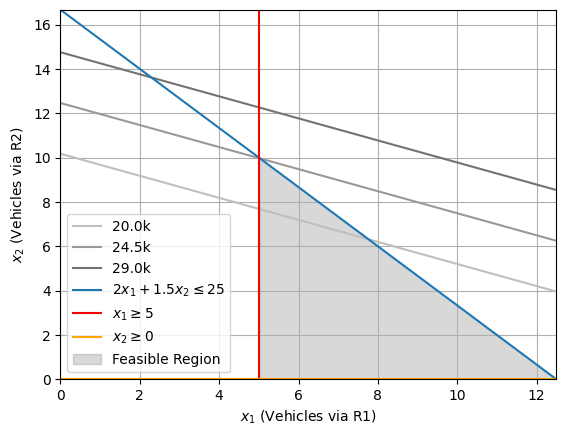

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 977.45, 1966.18  # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 2, 1.5, 25   # Coefficients for constraint a11 * x1 + a12 * x2 <= b1
a21, a22, b2 = 1, 0, 5      # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 0, 1, 0      # Coefficients for constraint a31 * x1 + a32 * x2 >= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Define set of isocost values (C)
C = [20000, 24500, 29000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for isocost line c1 * x1 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c/1000}k')

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 >= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11}x_1 + {a12}x_2 \leq {b1}$')
plt.axvline(x=b2, label=fr'$x_1 \geq {b2}$', color='red')
plt.axhline(y=b3, label=fr'$x_2 \geq {b3}$', color='orange')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_3, np.maximum(x2_3, x2_1), where=(x1 >= b2), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, b1/a11)
plt.ylim(0, b1/a12)
plt.xlabel(r'$x_1$ (Vehicles via R1)')
plt.ylabel(r'$x_2$ (Vehicles via R2)')
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

In this problem, the constraints define a bounded feasible region, making (5, 10) the unique optimal solution with $2x_1 + 1.5x_2 \leq 25$ and $x_1 \geq 10$ forming the binding constraints, while $x_2 \geq 0$ forming the non-binding constraints. Thus, the transportation firm should purchase and operate 5 buses with standard service and another 10 buses with express service, rendering average daily profit of about ₹24.5k.

---

How does the solution change if there was no commuter-hour constraint?

Obective:
$$
\max_{x_1, x_2} \ Z = 977.45x_1 + 1966.18x_2
$$

Subject to:

$$
\begin{aligned}
  & x_1 \geq 5 \\
  & x_2 \geq 0
\end{aligned}
$$

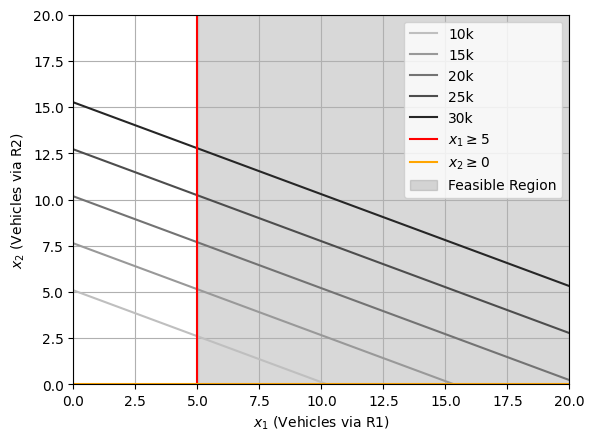

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters and constraint coefficients
c1, c2 = 977.45, 1966.18  # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 0, 5    # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 0, 1, 0    # Coefficients for constraint a21 * x1 + a22 * x2 >= b2

# Define the range of x1 values
x1 = np.linspace(0, 20, 400)

# Define set of isocost values (C)
C = [10000, 15000, 20000, 25000, 30000]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for isocost line c1 * x1 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c // 1000}k')

# Calculate x2 values for each constraint
x2_1 = np.full_like(x1, b1)   # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2

# Plot the constraints
plt.axvline(x=b1, label=fr'$x_1 \geq {b1}$', color='red')
plt.axhline(y=b2, label=fr'$x_2 \geq {b2}$', color='orange')

# Fill the feasible region where all constraints are satisfied
plt.fill_between(x1, x2_2, 20, where=(x1 >= b1), color='grey', alpha=0.3, label="Feasible Region")

# Set plot attributes
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel(r'$x_1$ (Vehicles via R1)')
plt.ylabel(r'$x_2$ (Vehicles via R2)')
plt.legend()
plt.grid(True)

# Display th eplot
plt.show()

Here, we have an unbounded feasible region, with no value in the feasible region being optimal. Generally speaking, this indicates an error in either problem definition, data collection, or problem formulation stage.

---

Note, for a general $n$-dimensional problem, i.e., for a problem with $n$ decision variables, we will have an $n$ dimensional feasible region. And therefore, for an $n$-dimensional problem, the graphical solution is not a viable alternative. In the next lecture we will develop spreadsheet-based solution methods for $n$-dimensional linear programming problems.